In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
price_df = pd.read_csv("./data/price/test_daily_price_total.csv")
price_df

,Open datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2018-01-01,13716.36,13818.55,12750.00,13380.00,8609.915844,1.147997e+08,105595,3961.938946,5.280975e+07
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08
2,2018-01-03,14675.11,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08
4,2018-01-05,15059.54,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08
...,...,...,...,...,...,...,...,...,...,...
2460,2024-09-26,63152.01,65839.00,62670.00,65173.99,28373.305930,1.831205e+09,4361333,15041.988600,9.711762e+08
2461,2024-09-27,65173.99,66498.00,64819.90,65769.95,22048.804870,1.448852e+09,3498529,11092.857160,7.291561e+08
2462,2024-09-28,65769.95,66260.00,65422.23,65858.00,9127.233160,6.001185e+08,1341703,4501.225340,2.960267e+08
2463,2024-09-29,65858.00,66076.12,65432.00,65602.01,8337.741110,5.479800e+08,1413449,4132.937800,2.716223e+08


In [193]:
columns = ['date', 'transaction_count', 'transaction_amount', 'transaction_flag']
transaction_df = pd.read_csv("./data/250125/big_transaction_address_transaction_10000_target_threshold_3000_receive_250125.csv")
transaction_df.columns = columns
transaction_df = transaction_df[(transaction_df['date'] >= '2018-01-01') & (transaction_df['date'] <= '2024-09-30')]
transaction_df = transaction_df.reset_index(drop=True)
transaction_df

,date,transaction_count,transaction_amount,transaction_flag
0,2018-01-01,109,1.402250e+06,0
1,2018-01-02,70,2.252229e+05,0
2,2018-01-03,201,8.486142e+05,0
3,2018-01-04,57,2.878202e+05,0
4,2018-01-05,169,1.120206e+06,0
...,...,...,...,...
2460,2024-09-26,99,6.171787e+05,0
2461,2024-09-27,81,4.762323e+05,0
2462,2024-09-28,86,6.037830e+05,0
2463,2024-09-29,70,4.838174e+05,0


In [194]:
price_df['transaction_count'] = transaction_df['transaction_count']
price_df['transaction_amount'] = transaction_df['transaction_amount']

price_df

,Open datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,transaction_amount
0,2018-01-01,13716.36,13818.55,12750.00,13380.00,8609.915844,1.147997e+08,105595,3961.938946,5.280975e+07,109,1.402250e+06
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08,70,2.252229e+05
2,2018-01-03,14675.11,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08,201,8.486142e+05
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08,57,2.878202e+05
4,2018-01-05,15059.54,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08,169,1.120206e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-09-26,63152.01,65839.00,62670.00,65173.99,28373.305930,1.831205e+09,4361333,15041.988600,9.711762e+08,99,6.171787e+05
2461,2024-09-27,65173.99,66498.00,64819.90,65769.95,22048.804870,1.448852e+09,3498529,11092.857160,7.291561e+08,81,4.762323e+05
2462,2024-09-28,65769.95,66260.00,65422.23,65858.00,9127.233160,6.001185e+08,1341703,4501.225340,2.960267e+08,86,6.037830e+05
2463,2024-09-29,65858.00,66076.12,65432.00,65602.01,8337.741110,5.479800e+08,1413449,4132.937800,2.716223e+08,70,4.838174e+05


In [195]:
price_df['transaction_count_returns'] = transaction_df['transaction_count'].pct_change()
price_df['transaction_amount_returns'] = transaction_df['transaction_amount'].pct_change()
price_df['tomorrow_returns'] = price_df['Close'].pct_change(1).shift(-1)

price_df = price_df.dropna()
price_df

,Open datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,transaction_amount,transaction_count_returns,transaction_amount_returns,tomorrow_returns
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08,70,2.252229e+05,-0.357798,-0.839385,0.016654
2,2018-01-03,14675.11,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08,201,8.486142e+05,1.871429,2.767886,0.009386
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08,57,2.878202e+05,-0.716418,-0.660835,0.126222
4,2018-01-05,15059.54,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08,169,1.120206e+06,1.964912,2.892035,0.006450
5,2018-01-06,16960.39,17143.13,16011.21,17069.79,18571.457508,3.092169e+08,158242,11007.164056,1.834178e+08,226,1.632946e+06,0.337278,0.457719,-0.053882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2024-09-25,64262.70,64817.99,62947.08,63152.01,17813.111680,1.135251e+09,3355531,8384.679830,5.345904e+08,111,8.541376e+05,0.168421,0.405854,0.032018
2460,2024-09-26,63152.01,65839.00,62670.00,65173.99,28373.305930,1.831205e+09,4361333,15041.988600,9.711762e+08,99,6.171787e+05,-0.108108,-0.277425,0.009144
2461,2024-09-27,65173.99,66498.00,64819.90,65769.95,22048.804870,1.448852e+09,3498529,11092.857160,7.291561e+08,81,4.762323e+05,-0.181818,-0.228372,0.001339
2462,2024-09-28,65769.95,66260.00,65422.23,65858.00,9127.233160,6.001185e+08,1341703,4501.225340,2.960267e+08,86,6.037830e+05,0.061728,0.267833,-0.003887


In [200]:
price_df['transaction_amount_trading_flag'] = price_df['transaction_amount_returns'].apply(lambda x: 1 if x >= 3 else 0)
price_df

C:\Users\slaye\AppData\Local\Temp\ipykernel_20808\1356882600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['transaction_amount_trading_flag'] = price_df['transaction_amount_returns'].apply(lambda x: 1 if x >= 3 else 0)


,Open datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,transaction_amount,transaction_count_returns,transaction_amount_returns,tomorrow_returns,transaction_amount_trading_flag
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08,70,2.252229e+05,-0.357798,-0.839385,0.016654,0
2,2018-01-03,14675.11,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08,201,8.486142e+05,1.871429,2.767886,0.009386,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08,57,2.878202e+05,-0.716418,-0.660835,0.126222,0
4,2018-01-05,15059.54,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08,169,1.120206e+06,1.964912,2.892035,0.006450,0
5,2018-01-06,16960.39,17143.13,16011.21,17069.79,18571.457508,3.092169e+08,158242,11007.164056,1.834178e+08,226,1.632946e+06,0.337278,0.457719,-0.053882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2024-09-25,64262.70,64817.99,62947.08,63152.01,17813.111680,1.135251e+09,3355531,8384.679830,5.345904e+08,111,8.541376e+05,0.168421,0.405854,0.032018,0
2460,2024-09-26,63152.01,65839.00,62670.00,65173.99,28373.305930,1.831205e+09,4361333,15041.988600,9.711762e+08,99,6.171787e+05,-0.108108,-0.277425,0.009144,0
2461,2024-09-27,65173.99,66498.00,64819.90,65769.95,22048.804870,1.448852e+09,3498529,11092.857160,7.291561e+08,81,4.762323e+05,-0.181818,-0.228372,0.001339,0
2462,2024-09-28,65769.95,66260.00,65422.23,65858.00,9127.233160,6.001185e+08,1341703,4501.225340,2.960267e+08,86,6.037830e+05,0.061728,0.267833,-0.003887,0


In [201]:
flag_trading_df = price_df[price_df['transaction_amount_trading_flag']==1]
flag_trading_df

,Open datetime,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,transaction_amount,transaction_count_returns,transaction_amount_returns,tomorrow_returns,transaction_amount_trading_flag
10,2018-01-11,14940.00,14968.68,11400.00,13238.78,33554.723751,4.465876e+08,239416,16422.019980,2.187622e+08,25,2.869421e+05,inf,inf,0.037861,1
15,2018-01-16,13500.00,13542.93,9035.00,10900.00,63401.169175,7.221508e+08,418243,30353.401717,3.467771e+08,75,3.185414e+05,inf,inf,0.008146,1
18,2018-01-19,10961.97,11795.00,10360.00,11474.98,34129.375421,3.827735e+08,273271,16871.416355,1.892597e+08,39,4.375396e+05,3.875000,10.715454,0.115465,1
21,2018-01-22,11530.00,11926.35,9900.24,10760.05,43752.606791,4.757165e+08,363264,21300.575828,2.316775e+08,8,7.673321e+04,7.000000,6.092577,0.003637,1
23,2018-01-24,10799.14,11570.48,10500.00,11349.99,27158.587762,2.994706e+08,293429,13087.393088,1.443352e+08,31,1.549303e+05,30.000000,8.725902,-0.015394,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2024-07-15,60797.91,64900.00,60632.30,64724.14,38690.978200,2.435541e+09,2600425,19076.542120,1.201412e+09,1089,8.222018e+06,20.780000,16.871432,0.004942,1
2399,2024-07-27,67908.00,69399.99,66650.00,67896.50,31710.219210,2.162335e+09,1690591,15838.928200,1.080427e+09,1272,7.831703e+06,52.000000,27.995232,0.005205,1
2401,2024-07-29,68249.88,70079.99,66428.00,66784.69,36467.296330,2.499266e+09,1952812,18196.233160,1.248743e+09,74,1.671909e+06,9.571429,13.282895,-0.008935,1
2409,2024-08-06,54018.82,57040.99,53950.00,56022.01,55884.776760,3.119019e+09,3433824,27934.192880,1.559418e+09,842,1.122869e+07,2.792793,6.303267,-0.015848,1


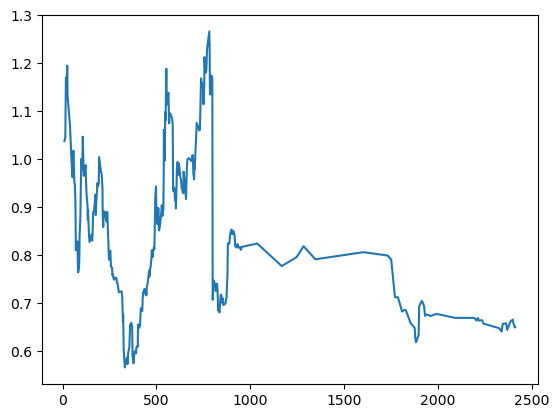

In [202]:
plt.plot((flag_trading_df['tomorrow_returns']+1).cumprod())

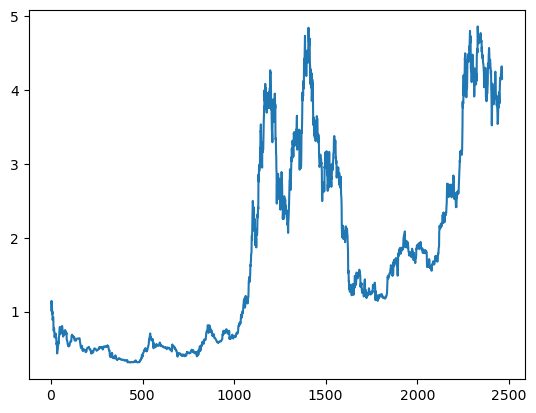

In [199]:
flag_trading_df = price_df[price_df['transaction_amount_trading_flag']==0]
plt.plot((flag_trading_df['tomorrow_returns']+1).cumprod())